Load the `ISLR2` and `tidyverse` packages.

In [53]:
library(ISLR2)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(tidymodels)

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [54]:
glimpse(Auto)



Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

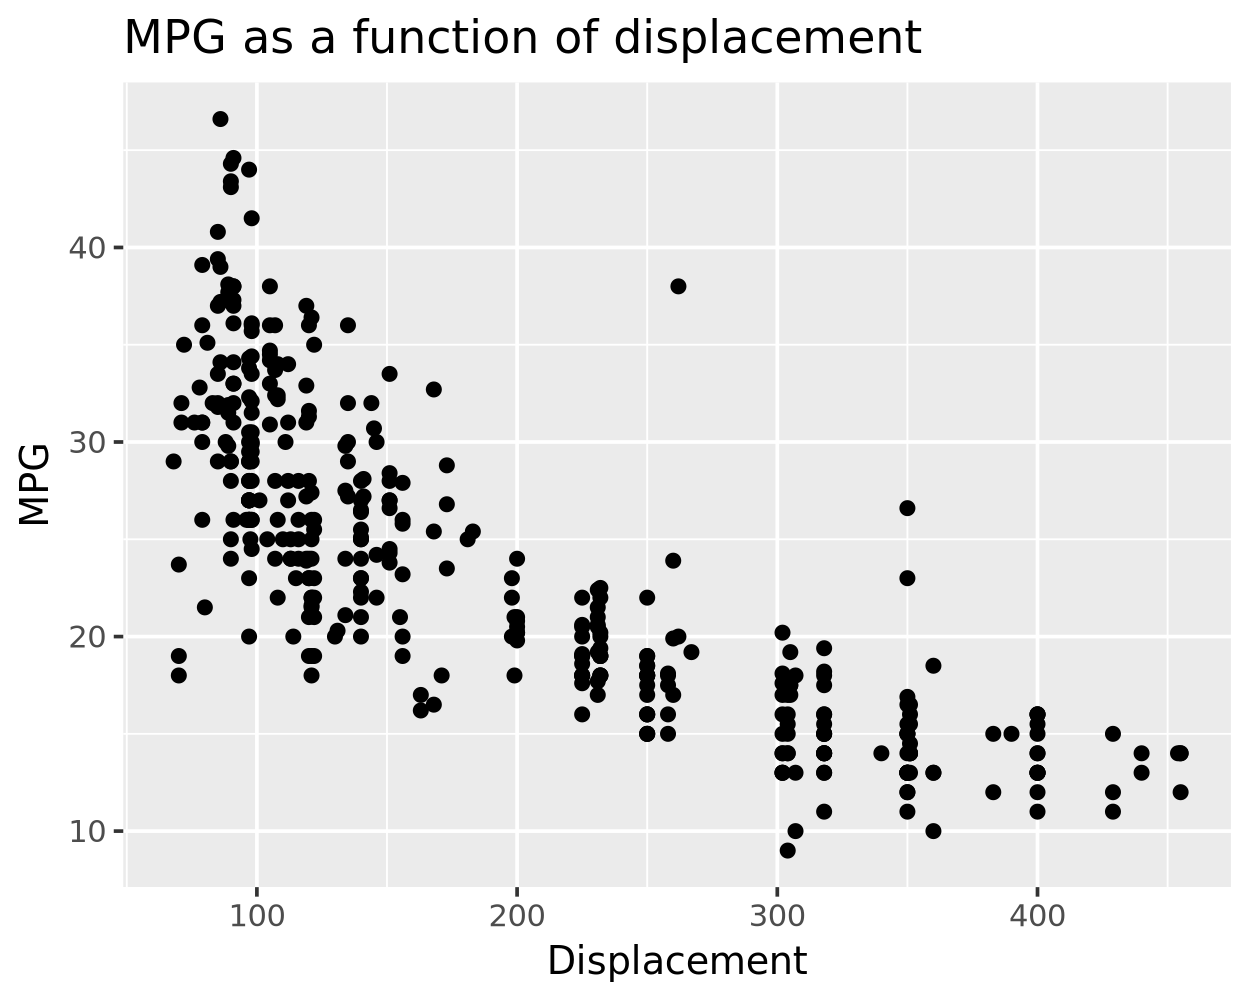

In [55]:
ggplot(Auto, aes(x = displacement, y = mpg)) +
    geom_point() + 
    labs(title = "MPG as a function of displacement",
         x = "Displacement",
         y = "MPG")



❓Does the relationship of `mpg` to `displacement` look linear?

**The relationship of mpg to displacement does appear to have a negative linear relationship.**



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

**I ran in to an error in juice(), where it was looking for a trained recipe, so I had to use bake() instead.**

**I also kept running into an error validate_column_names(), where the columns displacement and cylinders were missing. So I had 
to reappend those original columns to the transformed_data dataset**

[1] "mpg"               "displacement_ns_1" "displacement_ns_2"
 [4] "displacement_ns_3" "displacement_ns_4" "displacement_ns_5"
 [7] "cyl_cat_X4"        "cyl_cat_X5"        "cyl_cat_X6"       
[10] "cyl_cat_X8"        "displacement"      "cylinders"        
[13] ".pred"

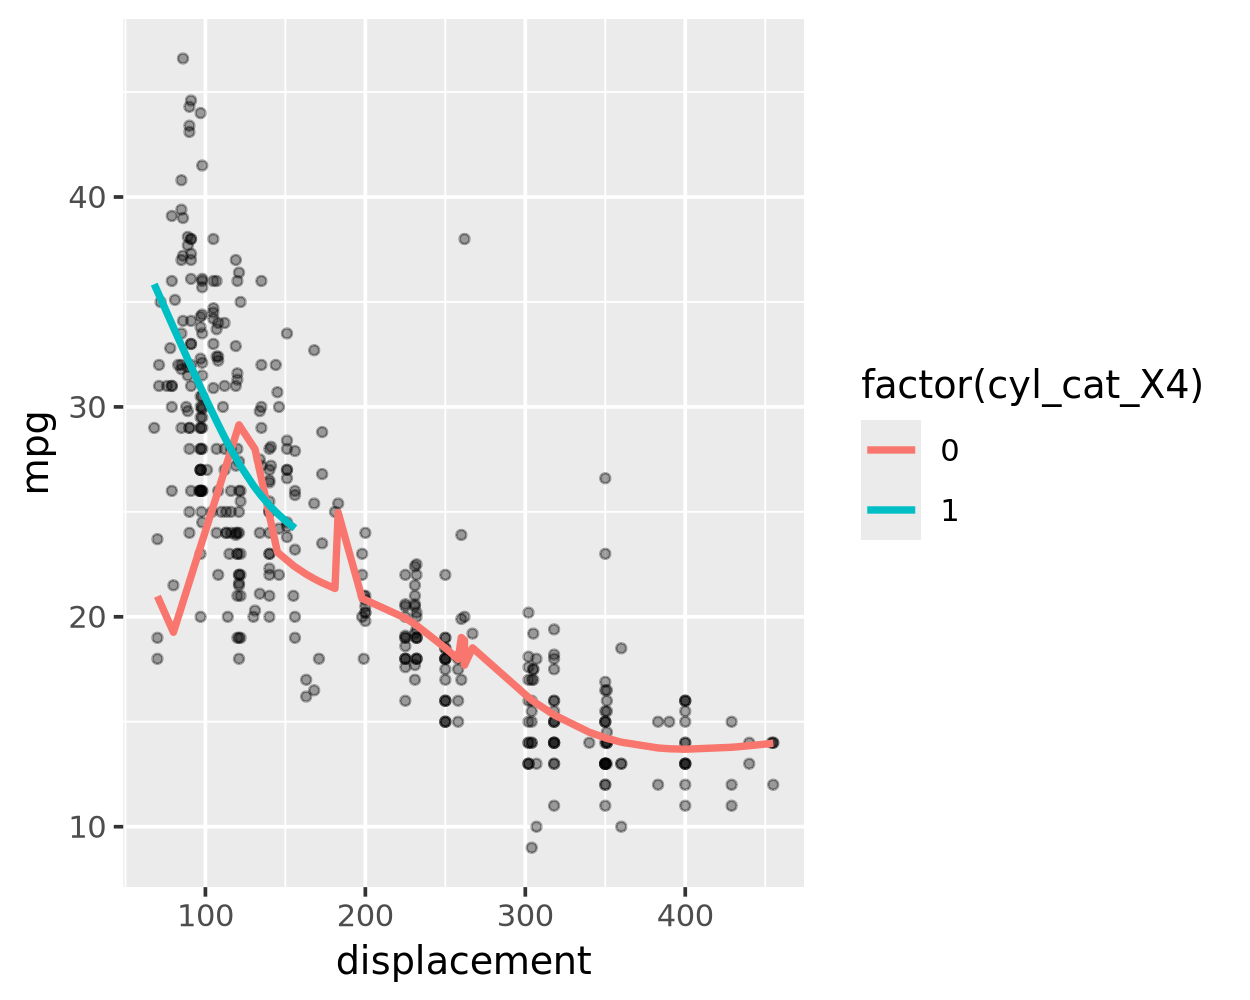

In [56]:
# Create the recipe
rec <- recipe(mpg ~ displacement + cylinders, data = Auto) |> #Target variable is mpg, and predictors are displacement and cylinders
  step_ns(displacement, deg_free = 5) |>  #natural spline transformation to the predictor displacement, with 5 degrees of freedom
  step_mutate(cyl_cat = factor(cylinders)) |> #Convert cylinders column into categorical 
  step_dummy(cyl_cat) |>  #one-hot encode cyl_cat
  step_rm(cylinders)  #remove the original cylinders column

# Prep the recipe
rec_prep <- prep(rec, training = Auto)

#linear regression model
mod <- linear_reg() |> 
  set_engine("lm")

#create workflow
wf <- workflow() |> 
  add_recipe(rec) |> 
  add_model(mod)

#fit the model
mod_fit <- fit(wf, data = Auto)

#apply transformations to Auto, transformed data stored in transformed_data
transformed_data <- bake(rec_prep, new_data = Auto)

#add the original displacement and cylinders columns to the transformed data for prediction
transformed_data$displacement <- Auto$displacement
transformed_data$cylinders <- Auto$cylinders

#make predictions using the fitted model on the transformed data
predictions <- predict(mod_fit, new_data = transformed_data)

#combine the predictions with the transformed data for visualization
visual_data <- bind_cols(transformed_data, predictions)

colnames(visual_data)  #check the names of the columns generated by step_dummy()

#visualize the results using the transformed displacement and dummy variables
ggplot(visual_data, aes(x = displacement, y = mpg)) +
  geom_point(size = 1, alpha = 0.35) +
  geom_line(aes(y = .pred, color = factor(cyl_cat_X4)), linewidth = 1)  #use the column cyl_cat_X4 as the factor for color